In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
directory = "/home/kaylavokt/Downloads/20250205_Coverslip_AJP"

probe = ["Probe1", "Probe2"]

probe1_dir = directory + "/" + probe[0]
files = os.listdir(probe1_dir)
probe1_files = np.sort([string for string in files if "xlsx" in string])

print("excel_files_probe1\n", probe1_files)

probe2_dir = directory + "/" + probe[1]
files = os.listdir(probe2_dir)
probe2_files = np.sort([string for string in files if "xlsx" in string])

print("excel_files_probe2\n", probe2_files)


path1 = probe1_dir + "/" + probe1_files[0]
path2 = probe2_dir + "/" + probe2_files[0]

excel_files_probe1
 ['Ch1_50mV_01-100kHz.xlsx' 'Ch1_50mV_01-100kHz_0x.xlsx'
 'Ch2_50mV_01-100kHz.xlsx' 'Ch3_50mV_01-100kHz.xlsx'
 'Ch4_50mV_01-100kHz.xlsx' 'Ch5_50mV_01-100kHz.xlsx'
 'Ch6_50mV_01-100kHz.xlsx']
excel_files_probe2
 ['Ch1_50mV_01-100kHz.xlsx' 'Ch2_50mV_01-100kHz.xlsx'
 'Ch3_50mV_01-100kHz.xlsx' 'Ch4_50mV_01-100kHz.xlsx'
 'Ch5_50mV_01-100kHz.xlsx' 'Ch6_50mV_01-100kHz.xlsx']


In [4]:
print(path1)

# Read the Excel file
# df = pd.read_excel(path1)

# Print the dataframe
# print(df)

/home/kaylavokt/Downloads/20250205_Coverslip_AJP/Probe1/Ch1_50mV_01-100kHz.xlsx


In [5]:
def extract_electrodes(probe1_data, probe2_data, electrode_size="small"):
    # Let electrode size be "small" "med" or "large"
    
    if electrode_size == "small":
        a = np.array([timepoint[0:2] for timepoint in probe1_data])
        b = np.array([timepoint[0:2] for timepoint in probe2_data])
        return np.concatenate((a, b), axis=1)
    elif electrode_size == "med":
        a = np.array([timepoint[2:4] for timepoint in probe1_data])
        b = np.array([timepoint[2:4] for timepoint in probe2_data])
        return np.concatenate((a, b), axis=1)
    elif electrode_size == "large":
        a = np.array([timepoint[4:6] for timepoint in probe1_data])
        b = np.array([timepoint[4:6] for timepoint in probe2_data])
        return np.concatenate((a, b), axis=1)
    else:
        print("Electrode Size Input Invalid. Use str small, med or large")
        return -1

arr = extract_electrodes(probe1_data, probe2_data, electrode_size="large")
print(np.shape(arr))
np.mean(arr, axis=1)

(9, 4)


array([1832.525 , 1655.7775, 1693.3275, 1824.3125, 1558.37  , 1732.8375,
       1691.23  , 2038.34  , 1711.025 ])

In [18]:
# Impedance data is structured as [small, small, med, med, large, large]

probe1_data = [[18595, 53535.1, 6450.95, 4713.92, 2283.85, 1752.85], # Feb 5
               [20302.5, 71939.3, 6453.36, 4563.4, 1926.64, 1606.42], # Feb 6
               [22517.8, 77456.1, 7584.06, 5377.16, 2122.34, 1754.5], # Feb 7
               [20405.5, 52912.6, 6267.13, 5339.2, 2372.97, 1790.06], # Feb 9
               [23088.6, 38618.1, 5040.86, 4945.62, 2104.97, 1589.17], # Feb 10
               [26263.9, 58582.8, 9137.72, 6086.48, 2511.1, 1726.76], # Feb 11
               [26839.8, 54047.8, 8535.73, 6634.19, 2664.68, 1833.61], # Feb 12
               [27077.6, 55185.9, 8502.2, 6825.79, 2803.87, 1943.22], # Feb 13
               # [1440.5, 2102.1, 1384.16, 1687.12, 1476.7, 1360.89] # Feb 17
              ]

probe2_data = [[13482.1, 9748.32, 4246.8, 3778.24, 1701.77, 1591.63],
               [7755.76, 7211.6, 3969.77, 4010.38, 1579.27, 1510.78],
               [13277.1, 8085.39, 4626.62, 3953.16, 1471.27, 1425.2],
               [6818.27, 5455.41, 3666.55, 2405.19, 1698.96, 1435.26],
               [7431.65, 4715.4, 3785.51, 1859.64, 1413.58, 1125.76],
               [6814.27, 3452.35, 4403.13, 2104.14, 1377.96, 1315.53],
               [8163.08, 4019.18, 4352.55, 1910.84, 1034.35, 1232.28],
               [9029.37, 2977.57, 2378.84, 1707.99, 1037.99, 2368.28],
               # [7798.3, 4008.31, 5179.81, 2575.7, 1968.43, 2038.08]
              ]

small = extract_electrodes(probe1_data, probe2_data, electrode_size="small")
med = extract_electrodes(probe1_data, probe2_data, electrode_size="med")
large = extract_electrodes(probe1_data, probe2_data, electrode_size="large")

means = [np.mean([18595, 53535.1, 13482.1, 9748.32]), 
         np.mean([6450.95, 4713.92, 4246.8, 3778.24]),
        np.mean([2283.85, 1752.85, 1701.77, 1591.63])]

stds = [np.std([18595, 53535.1, 13482.1, 9748.32]), 
         np.std([6450.95, 4713.92, 4246.8, 3778.24]),
        np.std([2283.85, 1752.85, 1701.77, 1591.63])]

In [7]:
small_electrodes = probe1_data[0][0:1], probe1_data[1][0:1]

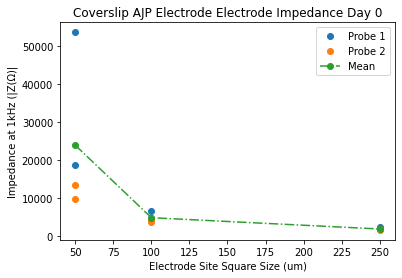

In [8]:
x = [50,50,100,100,250,250]
x_means = [50, 100, 250]

plt.plot(x, probe1_data[0], "o", label="Probe 1")
plt.plot(x, probe2_data[0], "o", label="Probe 2")

plt.plot(x_means, means, "-.o", label = "Mean")
# plt.errorbar(x_means, means, stds)

plt.xlabel("Electrode Site Square Size (um)")
plt.ylabel("Impedance at 1kHz (|Z(Ω)|")

plt.title("Coverslip AJP Electrode Electrode Impedance Day 0")

plt.legend()

# plt.savefig("coverslip-ajp-impedance-day0-means.png",dpi=300)

plt.show()

In [9]:
small

array([[18595.  , 53535.1 , 13482.1 ,  9748.32],
       [20302.5 , 71939.3 ,  7755.76,  7211.6 ],
       [22517.8 , 77456.1 , 13277.1 ,  8085.39],
       [20405.5 , 52912.6 ,  6818.27,  5455.41],
       [23088.6 , 38618.1 ,  7431.65,  4715.4 ],
       [26263.9 , 58582.8 ,  6814.27,  3452.35],
       [26839.8 , 54047.8 ,  8163.08,  4019.18],
       [27077.6 , 55185.9 ,  9029.37,  2977.57],
       [ 1440.5 ,  2102.1 ,  7798.3 ,  4008.31]])

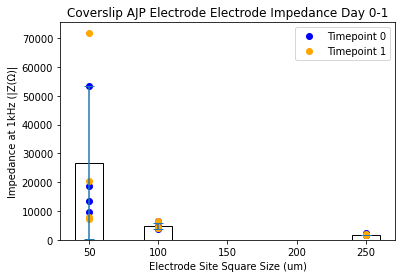

In [10]:
# Plotting Impedance vs. Electrode Size

x = [50,50,100,100,250,250]
x_means = [50, 100, 250]

timepoint = 0
plt.plot(x, probe1_data[timepoint], "o", label="Timepoint 0", color = "blue")
plt.plot(x, probe2_data[timepoint], "o", color = "blue")

timepoint = 1
plt.plot(x, probe1_data[timepoint], "o", label="Timepoint 1", color = "orange")
plt.plot(x, probe2_data[timepoint], "o", color = "orange")

plt.bar(x_means, [np.mean(small, axis=1)[timepoint], 
                   np.mean(med, axis=1)[timepoint], 
                   np.mean(large, axis=1)[timepoint]], width = 20, fill=None)

plt.errorbar(x_means, [np.mean(small, axis=1)[timepoint], 
                   np.mean(med, axis=1)[timepoint], 
                   np.mean(large, axis=1)[timepoint]], 
        yerr = [np.std(small, axis=1)[timepoint], 
                   np.std(med, axis=1)[timepoint], 
                   np.std(large, axis=1)[timepoint]], fmt='none', capsize = 5)

plt.xlabel("Electrode Site Square Size (um)")
plt.ylabel("Impedance at 1kHz (|Z(Ω)|")

plt.title("Coverslip AJP Electrode Electrode Impedance Day 0-1")

plt.legend()

plt.savefig("coverslip-ajp-impedance-vs-size.png",dpi=300)

plt.show()

# plt.plot(x_means, [np.mean(small, axis=1)[timepoint], 
#                    np.mean(med, axis=1)[timepoint], 
#                    np.mean(large, axis=1)[timepoint]], "-.", label = "Mean")

In [11]:
np.std(small, axis=0)

array([ 7408.222746  , 20477.2889065 ,  2450.68806026,  2192.15188462])

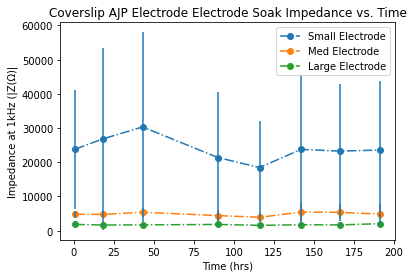

In [19]:
# Plotting Impedance vs. Time Point

x = [50,50,100,100,250,250]
x_means = [50, 100, 250]
# timepoints = [1, 17, 42, 65+24, 91+24, ] # in hours
timepoints = [1, # Feb 5
              1+17, # Feb 6
              1+17+25, # Feb 7
              1+17+25+(24)+23, # Feb 9
              1+17+25+(24)+23+26, # Feb 10
              1+17+25+(24)+23+26+26, # Feb 11
              1+17+25+(24)+23+26+26+24, # Feb 12
              1+17+25+(24)+23+26+26+24+25, # Feb 13
              # 1+17+25+(24)+23+26+26+24+25+(72)+19 # Feb 17
             ]

plt.plot(timepoints, np.mean(small, axis=1), "o-.", label= "Small Electrode" )
plt.errorbar(timepoints, np.mean(small, axis=1), yerr = np.std(small, axis=1), fmt='none')

plt.plot(timepoints, np.mean(med, axis=1), "o-.", label= "Med Electrode" )
plt.errorbar(timepoints, np.mean(med, axis=1), yerr = np.std(med, axis=1), fmt='none')


plt.plot(timepoints, np.mean(large, axis=1), "o-.", label= "Large Electrode" )
plt.errorbar(timepoints, np.mean(large, axis=1), yerr = np.std(large, axis=1), fmt='none')


plt.xlabel("Time (hrs)")
plt.ylabel("Impedance at 1kHz (|Z(Ω)|")

plt.title("Coverslip AJP Electrode Electrode Soak Impedance vs. Time")

plt.legend()

plt.savefig("coverslip-ajp-impedance-vs-time.png",dpi=300)

plt.show()

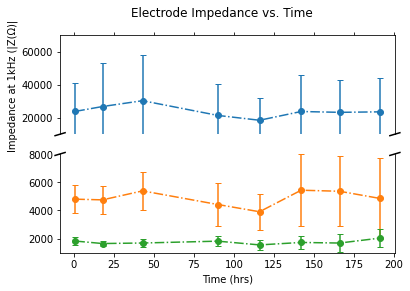

In [20]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

line, = ax.plot(timepoints, np.mean(small, axis=1), "o-.", label= "Small Electrode")
ax.errorbar(timepoints, np.mean(small, axis=1), yerr = np.std(small, axis=1), fmt='none', color=str(line.get_color()), capsize=3)

line, = ax2.plot(timepoints, np.mean(med, axis=1), "o-.", label= "Med Electrode", color="tab:orange")
ax2.errorbar(timepoints, np.mean(med, axis=1), yerr = np.std(med, axis=1), fmt='none', color=str(line.get_color()), capsize=3)

line, = ax2.plot(timepoints, np.mean(large, axis=1), "o-.", label= "Large Electrode", color="tab:green")
ax2.errorbar(timepoints, np.mean(large, axis=1), yerr = np.std(large, axis=1), fmt='none', color=str(line.get_color()), capsize=3)

ax.set_ylim(10000, 70000)  # outliers only
ax2.set_ylim(1000, 8000)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.suptitle("Electrode Impedance vs. Time")
ax2.set_xlabel("Time (hrs)")
ax.set_ylabel("Impedance at 1kHz (|Z(Ω)|", multialignment='center')

plt.savefig("coverslip-ajp-impedance-vs-time-broken-axis.png",dpi=300)
plt.show()

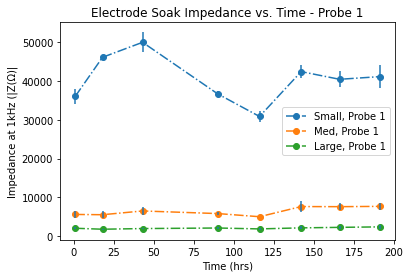

In [41]:
# Split up Data By Probe

# Plotting Impedance vs. Time Point

plt.plot(timepoints, np.mean(small[:, 0:2], axis=1), "o-.", label= "Small, Probe 1" )
plt.errorbar(timepoints, np.mean(small[:, 0:2], axis=1), yerr = np.std(small[:, 2:4], axis=1), fmt='none')

plt.plot(timepoints, np.mean(med[:, 0:2], axis=1), "o-.", label= "Med, Probe 1" )
plt.errorbar(timepoints, np.mean(med[:, 0:2], axis=1), yerr = np.std(med[:, 0:2], axis=1), fmt='none')

plt.plot(timepoints, np.mean(large[:, 0:2], axis=1), "o-.", label= "Large, Probe 1" )
plt.errorbar(timepoints, np.mean(large[:, 0:2], axis=1), yerr = np.std(large[:, 0:2], axis=1), fmt='none')


plt.xlabel("Time (hrs)")
plt.ylabel("Impedance at 1kHz (|Z(Ω)|")

plt.title("Electrode Soak Impedance vs. Time - Probe 1")

plt.legend()

plt.savefig("impedance-vs-time-probe1.png",dpi=300)

plt.show()

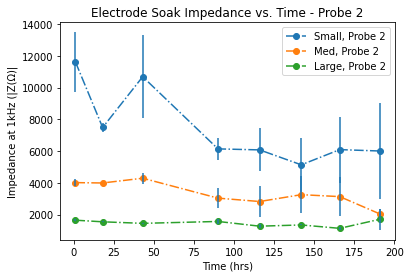

In [42]:
# Split up Data By Probe

# Plotting Impedance vs. Time Point

plt.plot(timepoints, np.mean(small[:, 2:4], axis=1), "o-.", label= "Small, Probe 2" )
plt.errorbar(timepoints, np.mean(small[:, 2:4], axis=1), yerr = np.std(small[:, 2:4], axis=1), fmt='none')


plt.plot(timepoints, np.mean(med[:, 2:4], axis=1), "o-.", label= "Med, Probe 2" )
plt.errorbar(timepoints, np.mean(med[:, 2:4], axis=1), yerr = np.std(med[:, 2:4], axis=1), fmt='none')

plt.plot(timepoints, np.mean(large[:, 2:4], axis=1), "o-.", label= "Large, Probe 2" )
plt.errorbar(timepoints, np.mean(large[:, 2:4], axis=1), yerr = np.std(large[:, 2:4], axis=1), fmt='none')


plt.xlabel("Time (hrs)")
plt.ylabel("Impedance at 1kHz (|Z(Ω)|")

plt.title("Electrode Soak Impedance vs. Time - Probe 2")

plt.legend()

plt.savefig("impedance-vs-time-probe2.png",dpi=300)

plt.show()